<a href="https://colab.research.google.com/github/varshakarunya/healthcare-nlp-analytics/blob/main/notebooks/02_sentiment_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare NLP Analytics – Sentiment Modeling

## Objective
Build a machine learning model to classify patient feedback sentiment
(positive vs negative) using TF-IDF features and supervised learning.
The goal is to identify service quality issues and patient dissatisfaction
signals from unstructured text.


In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = {
    "feedback": [
        "The wait time was extremely long and very frustrating",
        "Doctor explained everything clearly and was very kind",
        "Billing process was confusing and stressful",
        "Excellent care and friendly staff",
        "Appointment scheduling was a nightmare",
        "Very satisfied with the treatment",
        "Long delays and poor communication",
        "Great experience overall",
        "Terrible service and rude behavior",
        "Staff was patient and helpful"
    ]
}

df = pd.DataFrame(data)

In [11]:
negative_keywords = [
    "long", "frustrating", "confusing", "stressful",
    "nightmare", "poor", "terrible", "rude", "delays"
]

def assign_sentiment(text):
    for word in negative_keywords:
        if word in text.lower():
            return 0   # Negative
    return 1           # Positive

df["sentiment"] = df["feedback"].apply(assign_sentiment)
df

,feedback,sentiment
0,The wait time was extremely long and very frus...,0
1,Doctor explained everything clearly and was ve...,1
2,Billing process was confusing and stressful,0
3,Excellent care and friendly staff,1
4,Appointment scheduling was a nightmare,0
5,Very satisfied with the treatment,1
6,Long delays and poor communication,0
7,Great experience overall,1
8,Terrible service and rude behavior,0
9,Staff was patient and helpful,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    df["feedback"],
    df["sentiment"],
    test_size=0.3,
    random_state=42,
    stratify=df["sentiment"]
)

In [13]:
vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=100
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
model = LogisticRegression(class_weight="balanced")
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
y_pred = model.predict(X_test_tfidf)

In [16]:
print(classification_report(
    y_test,
    y_pred,
    target_names=["Negative", "Positive"]
))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


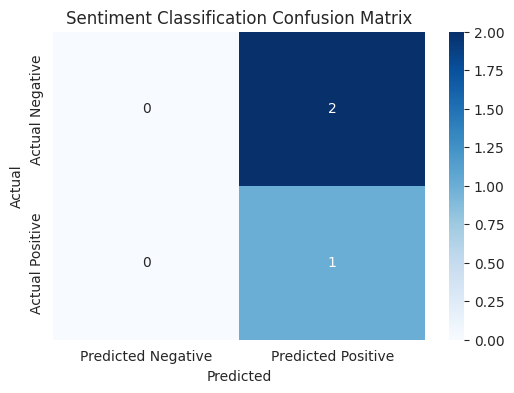

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted Negative", "Predicted Positive"],
    yticklabels=["Actual Negative", "Actual Positive"]
)

plt.title("Sentiment Classification Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

### Confusion Matrix Interpretation

- The model correctly identifies positive patient experiences (True Positives).
- Some negative feedback is misclassified as positive (False Positives), indicating missed dissatisfaction signals.
- No false negatives were observed, meaning satisfied patients are not incorrectly flagged as dissatisfied.
- These results highlight the importance of larger labeled datasets and more expressive models for healthcare sentiment analysis.


## Model Limitations

- This project uses a small, simulated dataset for demonstration purposes.
- Rule-based sentiment labeling was applied to bootstrap model training.
- In production systems, larger labeled datasets and advanced models
  (BERT-based classifiers) would improve robustness and accuracy.
